# Interleaved Randomized Benchmarking (IRB)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Infleqtion/client-superstaq/blob/main/docs/source/apps/supermarq/qcvv/qcvv_irb_css.ipynb) [![Launch Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Infleqtion/client-superstaq/HEAD?labpath=docs/source/apps/supermarq/qcvv/qcvv_irb_css.ipynb)

The interleaved randomized benchmarking routine allows us to estimate the gate fidelity of single
qubit Clifford gates. To demonstrate this routine, consider device noise modelled by an amplitude 
damping channel with decay probability $\gamma=0.01$

In [1]:
import cirq
import numpy as np
import supermarq

In [2]:
decay_prob = 0.025
noise = cirq.AmplitudeDampingChannel(gamma=decay_prob)
simulator = cirq.DensityMatrixSimulator(noise=noise)

We can calculate the average fidelity of this channel [as](https://quantumcomputing.stackexchange.com/questions/16074/how-to-calculate-the-average-fidelity-of-an-amplitude-damping-channel):
$$\begin{align}
\overline{F} &= \int\langle\psi|\mathcal{N_\gamma}(|\psi\rangle\langle\psi|)|\psi\rangle d\psi\\
&=\int\langle\psi|K_0|\psi\rangle\langle\psi|K_0^\dagger|\psi\rangle + \langle\psi|K_1|\psi\rangle\langle\psi|K_1^\dagger|\psi\rangle d\psi\\
& =\frac{1}{4\pi}\int_0^\pi\int_0^{2\pi}\left|\begin{pmatrix}\cos\frac{\theta}{2}&e^{-i\phi}\sin\frac{\theta}{2}\end{pmatrix}\begin{pmatrix}1 & 0 \\0 & \sqrt{1 - \gamma}\end{pmatrix}\begin{pmatrix}\cos\frac{\theta}{2}\\e^{i\phi}\sin\frac{\theta}{2}\end{pmatrix}\right|^2\sin\theta \\
& + \left|\begin{pmatrix}\cos\frac{\theta}{2}&e^{-i\phi}\sin\frac{\theta}{2}\end{pmatrix}\begin{pmatrix}0 & \sqrt{\gamma} \\0 & 0\end{pmatrix}\begin{pmatrix}\cos\frac{\theta}{2}\\e^{i\phi}\sin\frac{\theta}{2}\end{pmatrix}\right|^2\sin\theta d\phi d\theta \\
&=\frac{1}{4\pi}\int_0^\pi\int_0^{2\pi}\left|\cos^2\frac{\theta}{2}+\sqrt{1-\gamma}\sin^2\frac{\theta}{2}\right|^2\sin\theta + \left|\sqrt{\gamma}e^{i\phi}\sin\frac{\theta}{2}\cos\frac{\theta}{2}\right|^2\sin\theta d\phi d\theta \\
&=\frac{1}{2}\int_0^\pi\left(\cos^4\frac{\theta}{2}+(1-\gamma)\sin^4\frac{\theta}{2}+\frac{\sqrt{1-\gamma}}{2}\sin^2\theta + \frac{\gamma}{4}\sin^2\theta\right)\sin\theta d\theta \\
&=\frac{1}{2}\int_0^\pi\sin\theta\cos^4\frac{\theta}{2}+(1-\gamma)\sin\theta\sin^4\frac{\theta}{2}+\frac{\gamma+2\sqrt{1-\gamma}}{4}\sin^3\theta d\theta \\
&=\frac{1}{2}\left(\frac{2}{3} + (1-\gamma)\frac{2}{3} + \frac{\gamma+2\sqrt{1-\gamma}}{4}\frac{4}{3}\right) \\
&=\frac{1}{2}\left(\frac{4}{3} - \frac{\gamma}{3} + \frac{2\sqrt{1-\gamma}}{3}\right) \\
&=\frac{2}{3}-\frac{\gamma}{6} + \frac{\sqrt{1-\gamma}}{3}.
\end{align}$$

Thus we have a gate error $$\frac{1}{3}+\frac{\gamma}{6} - \frac{\sqrt{1-\gamma}}{3}$$

In [3]:
expected_gate_error = 1 / 3 + decay_prob / 6 - np.sqrt(1 - decay_prob) / 3

In [4]:
experiment = supermarq.qcvv.IRB(interleaved_gate=cirq.ops.SingleQubitCliffordGate.Y)
experiment.prepare_experiment(100, [1, 5, 10, 15])
experiment.run_with_simulator(simulator=simulator)

Building circuits:   0%|          | 0/400 [00:00<?, ?it/s]

Simulating circuits:   0%|          | 0/800 [00:00<?, ?it/s]

IRBResults(target='Local simulator', total_circuits=800, experiment_name='IRB', rb_layer_fidelity=0.9835345476930657, rb_layer_fidelity_std=0.0004865849120610916, irb_layer_fidelity=0.9672464523458026, irb_layer_fidelity_std=0.000336442324359281, average_interleaved_gate_error=0.008280388007451123, average_interleaved_gate_error_std=0.0002973777530802783)


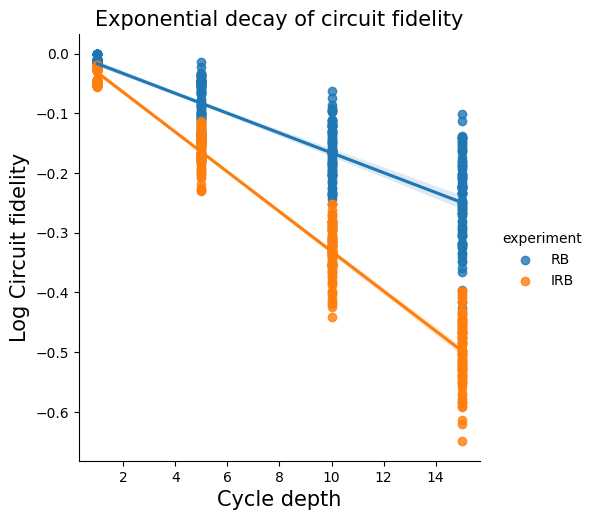

In [5]:
if experiment.collect_data():
    results = experiment.analyze_results(plot_results=True)
    print(results)

In [6]:
print(f"Expected gate error: {expected_gate_error:.6f}")
print(
    f"Measured gate error: {results.average_interleaved_gate_error:.6f} +/- {results.average_interleaved_gate_error_std:.6f}"
)

Expected gate error: 0.008360
Measured gate error: 0.008280 +/- 0.000297
